In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

column_names = ["Type", "Capacity", "Fill", "Time", "Num Insertions"]
df = pd.DataFrame(columns=column_names)



# Parse and store the data from each file
for i in range(1, 6):
    file_path = f"../data/murmur3/polaris/data{i}.txt"
    with open(file_path, 'r') as file:
        for line in file:
            # parse_line(line)
            parts = line.strip().split()

            type = parts[0]
            capacity = int(parts[2])
            fill = int(parts[4])
            time = float(parts[6])
            num_insertions = int(parts[8])
            new_row = {"Type" : type, "Capacity" : capacity, "Fill" : fill, "Time" : time, "Num Insertions" : num_insertions}

            # df = df.append(new_row, ignore_index=True)
            df = pd.concat([df, pd.DataFrame.from_records([new_row])])
            


          
insertion_data = df[df["Type"] == "I"]
find_data = df[df["Type"] == "FT"]
single_data = df[df["Type"] == "SI"]
multiple_data = df[df["Type"] == "MI"]


/tmp/ipykernel_36100/4097242236.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame.from_records([new_row])])


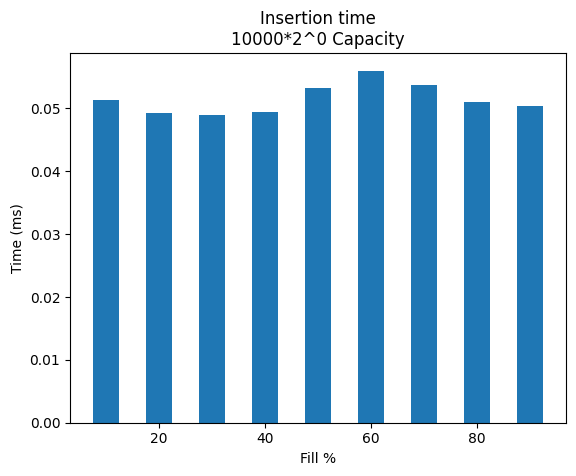

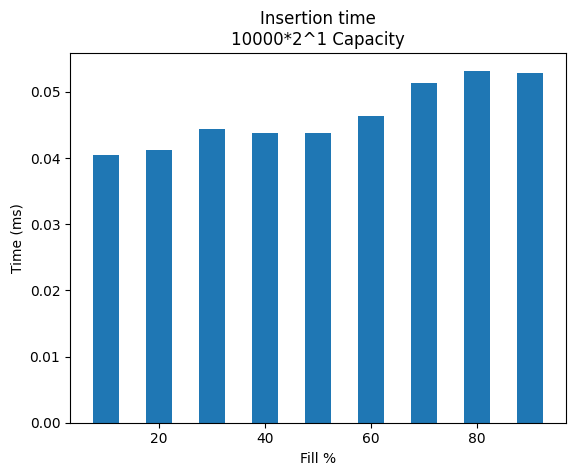

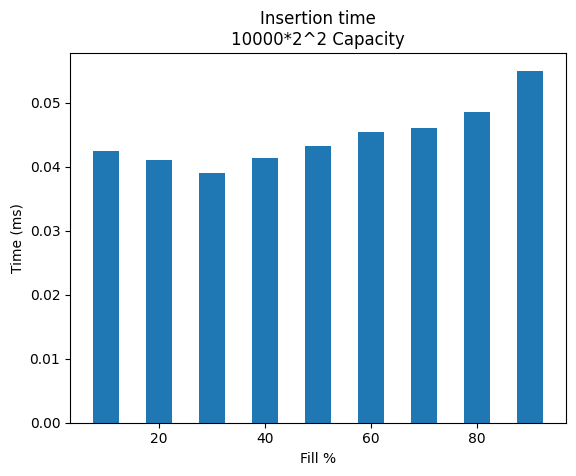

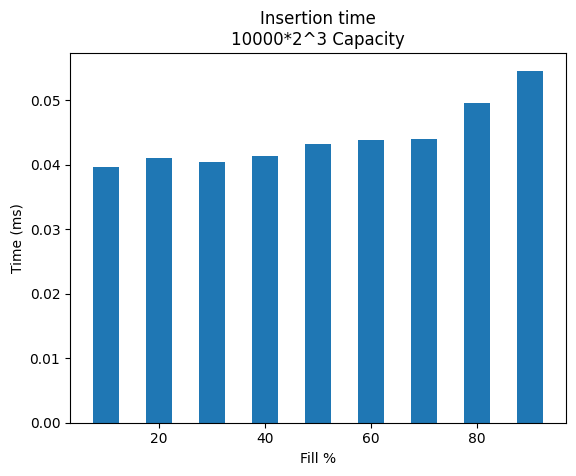

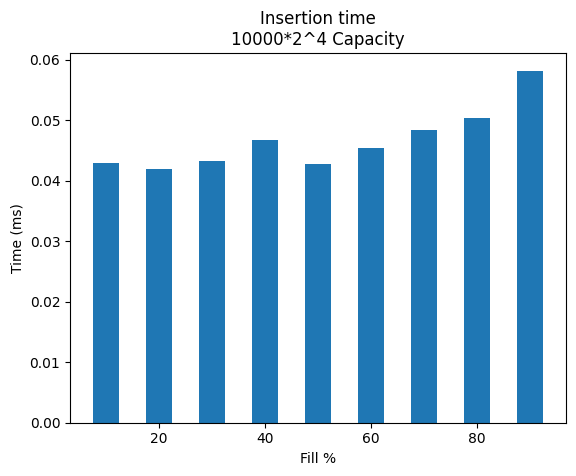

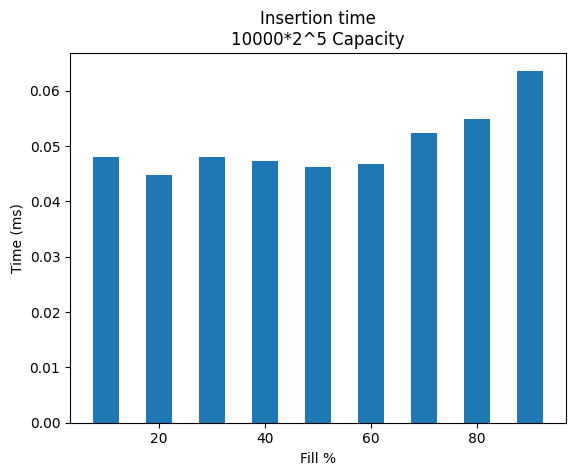

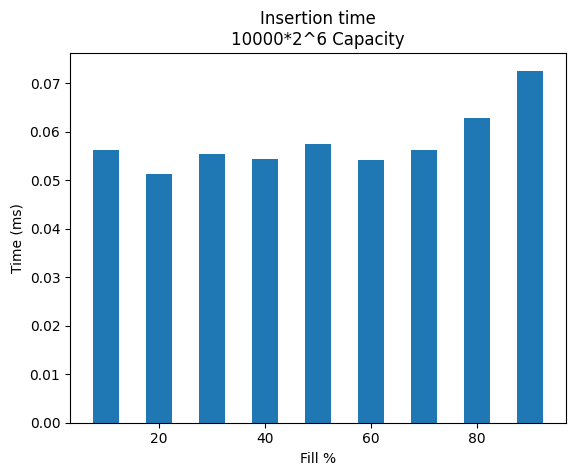

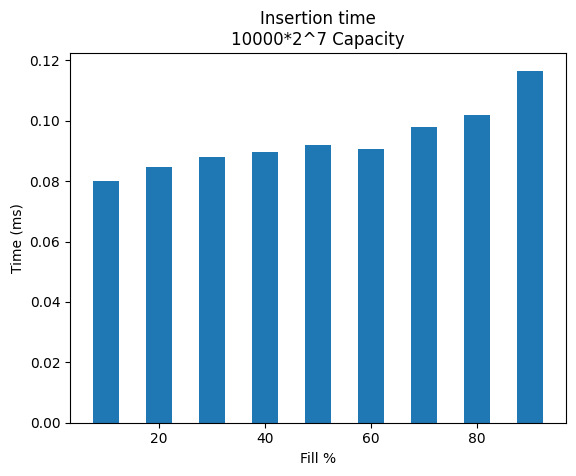

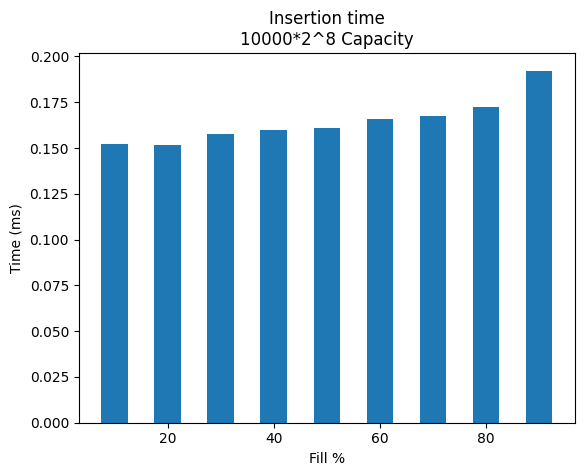

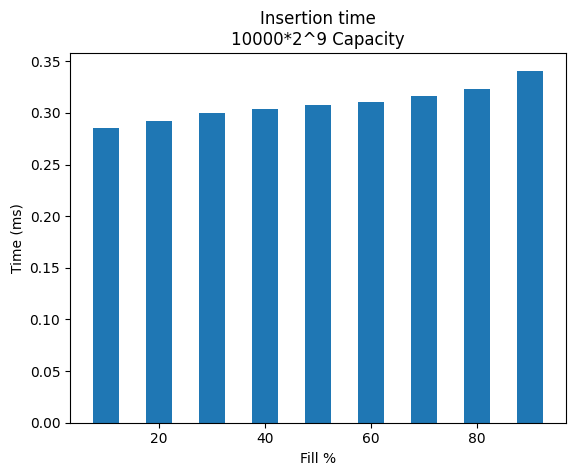

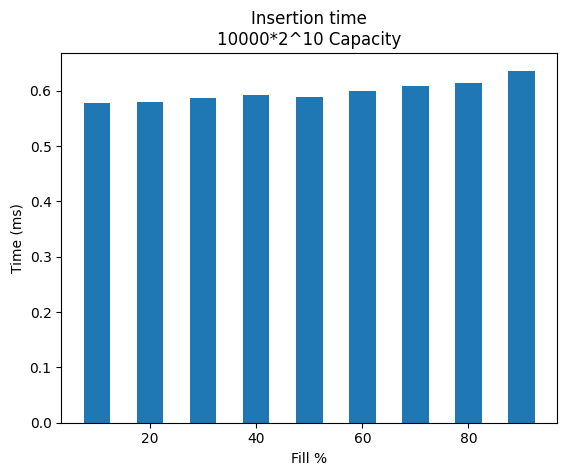

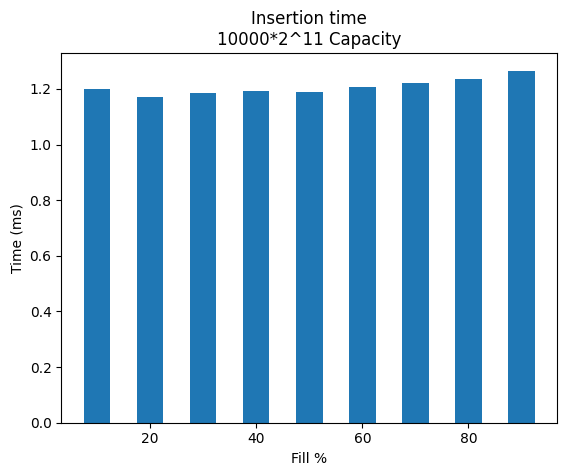

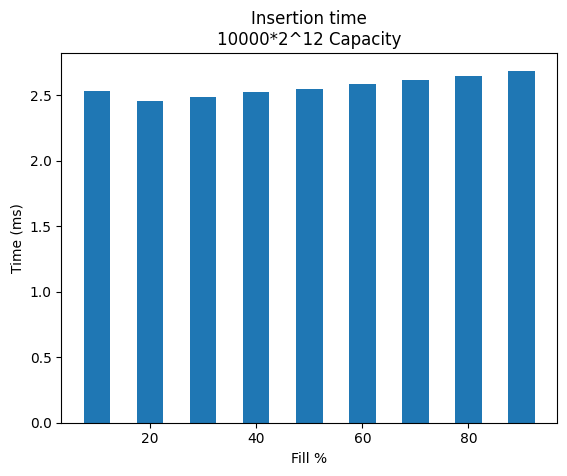

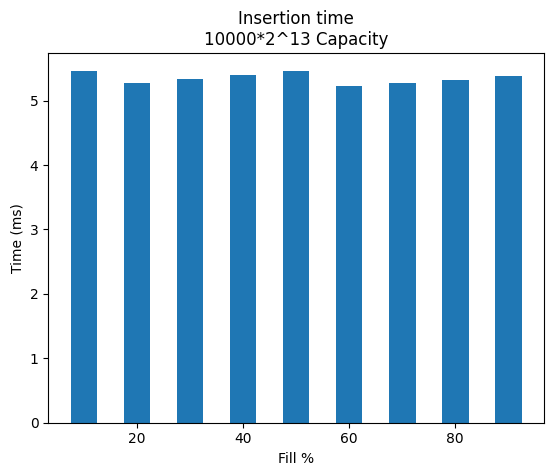

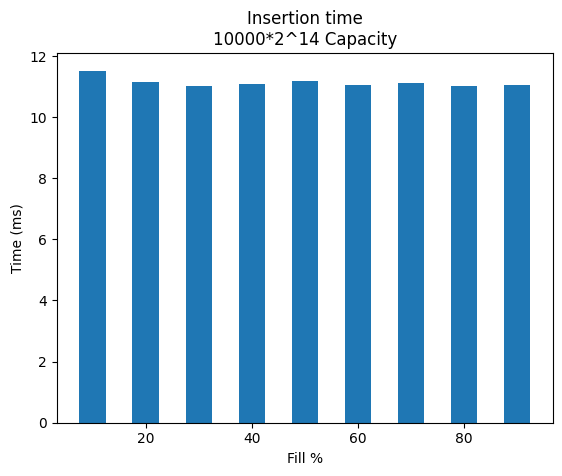

In [180]:
#Graphs of different capacities and they insertion times over different fills
capacity = 10000
for i in range(1, 16):
    rel_data = insertion_data[insertion_data["Capacity"] == capacity]
    condensed_average = rel_data.groupby('Fill').agg({'Type': 'first', 'Capacity': 'first', 'Time': 'mean', 'Num Insertions': 'first'}).reset_index()

    x = condensed_average["Fill"]
    # x = [f"10000*2^{i}" for i in range(15)]
    y = np.array(condensed_average["Time"]) * 1000

    plt.bar(x, y, width=5)
    # plt.yscale('log')
    plt.xlabel("Fill %")
    plt.ylabel("Time (ms)")
    plt.title(f"Insertion time\n10000*2^{i-1} Capacity")
    plt.show()
    capacity = capacity * 2

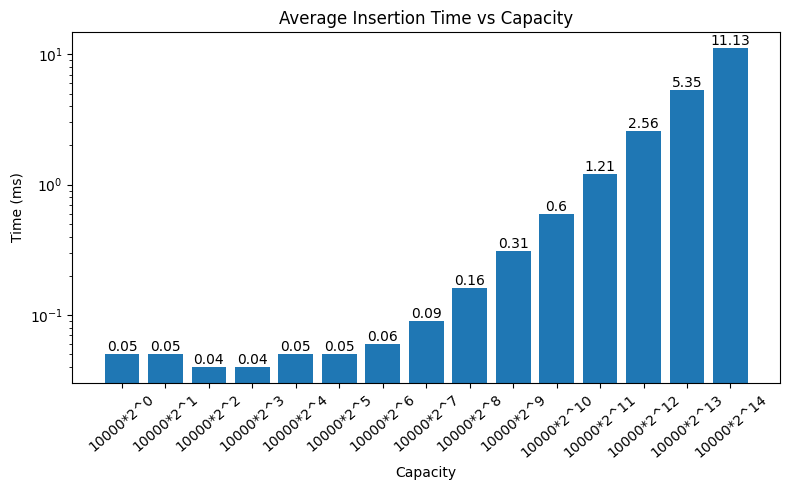

In [169]:
#Average insertion time over 
x = [f"10000*2^{i}" for i in range(15)]
y = []
capacity = 10000
for i in range(1, 16):
    rel_data = insertion_data[insertion_data["Capacity"] == capacity]
    condensed_average = rel_data.groupby('Fill').agg({'Type': 'first', 'Capacity': 'first', 'Time': 'mean', 'Num Insertions': 'first'}).reset_index()
    
    #Is this wise? Speak with Nigel
    res = np.array(condensed_average["Time"]) * 1000
    res = np.average(res)

    y.append(res)

    capacity = capacity * 2

y = np.round(y, 2)

plt.figure(figsize=(8, 5))  #
plt.bar(x, y)

for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha='center', va='bottom')

plt.yscale('log')
plt.xlabel("Capacity")
plt.ylabel("Time (ms)")
plt.xticks(rotation=40)
plt.title("Average Insertion Time vs Capacity")
plt.tight_layout()
plt.show()

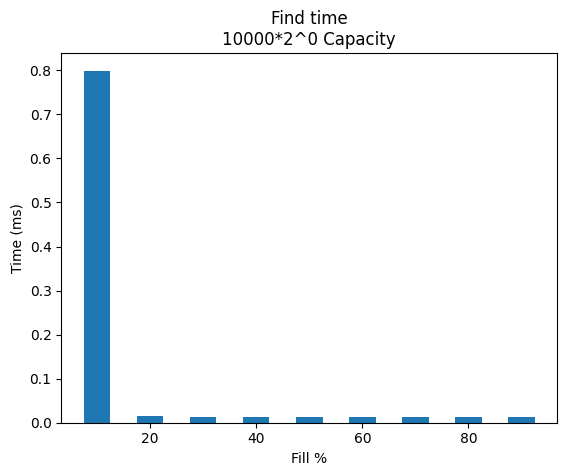

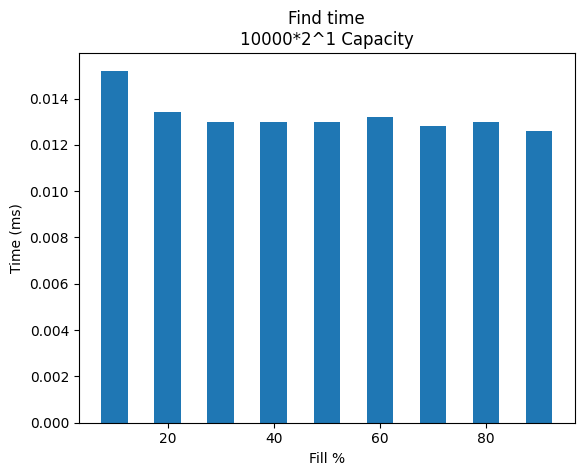

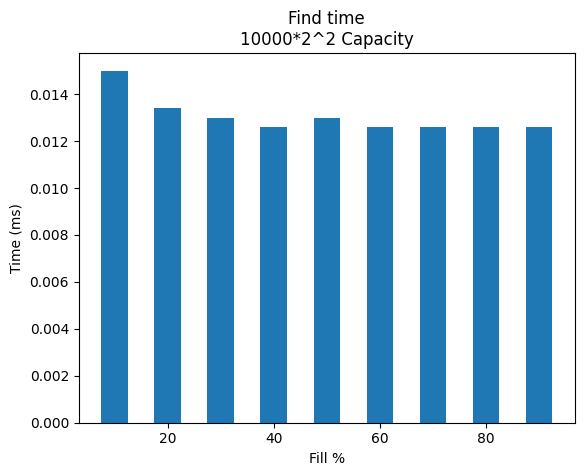

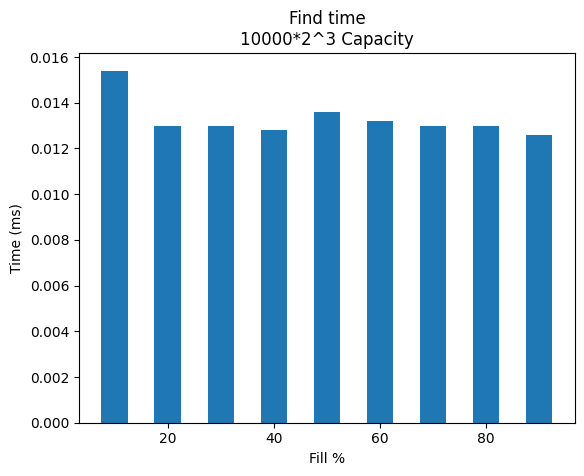

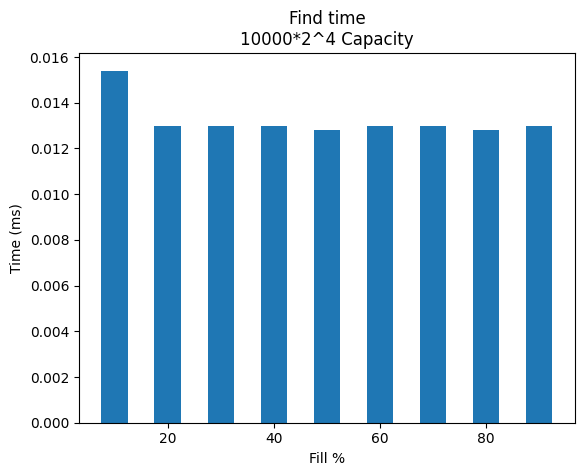

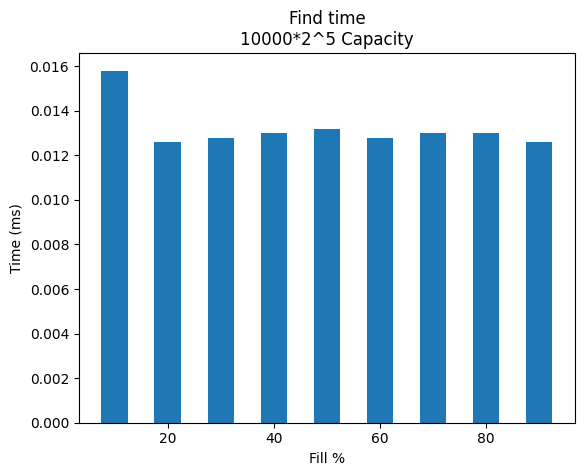

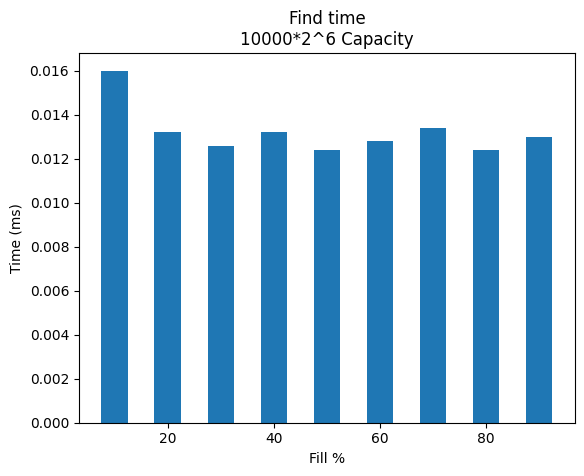

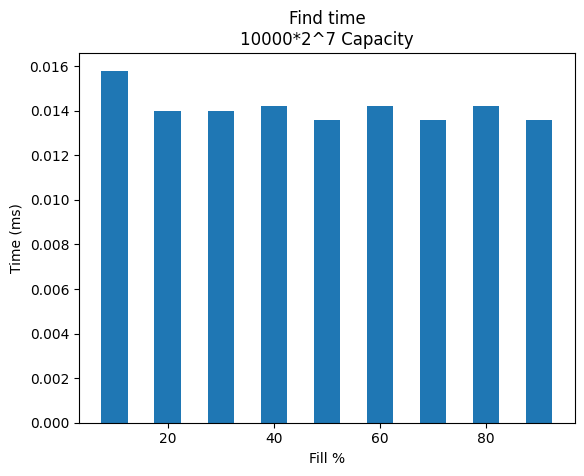

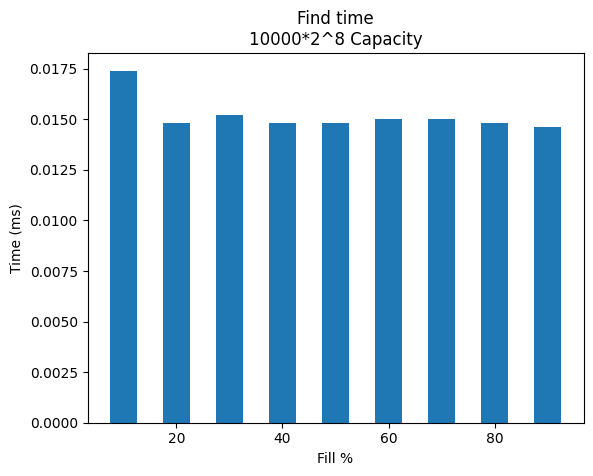

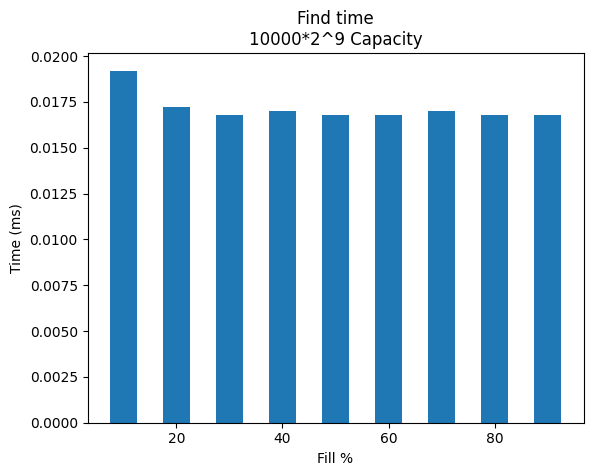

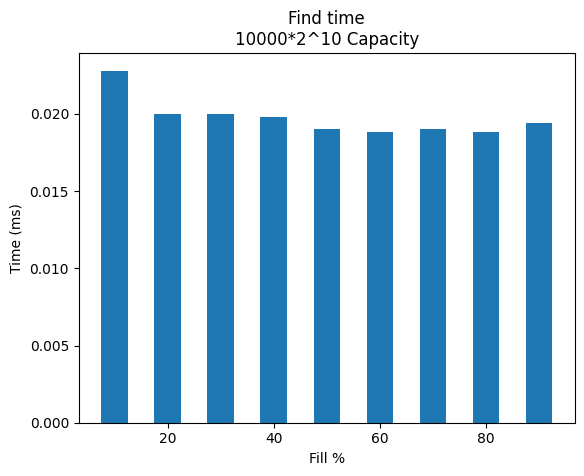

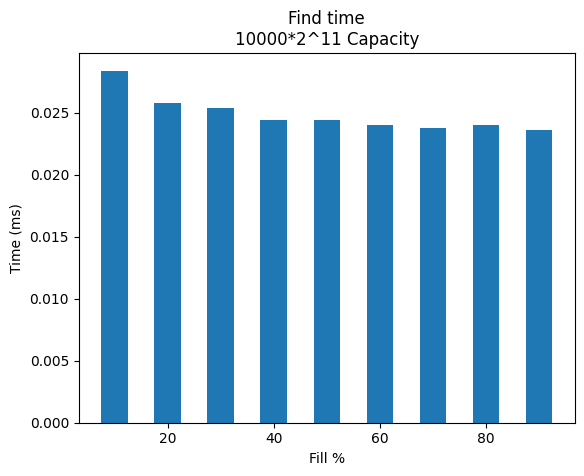

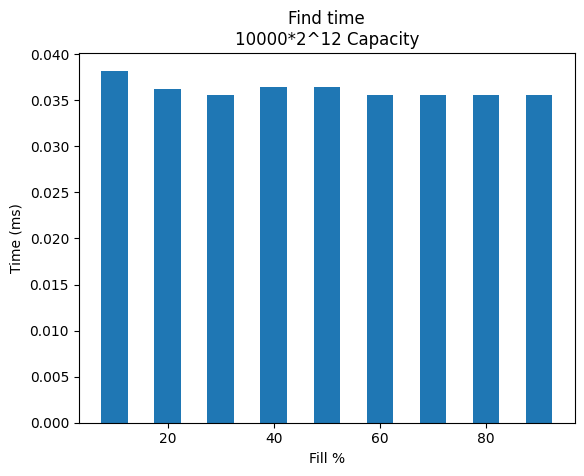

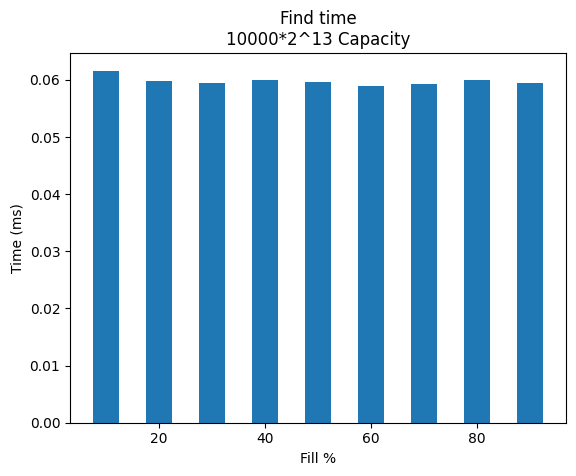

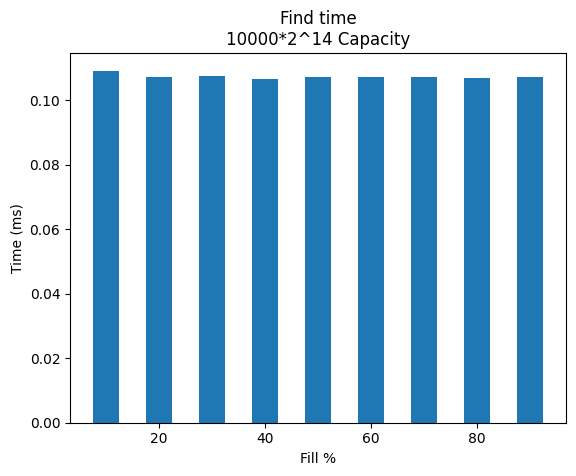

In [184]:
#Graphs of different capacities and they insertion times over different fills
capacity = 10000
for i in range(1, 16):
    rel_data = find_data[find_data["Capacity"] == capacity]
    condensed_average = rel_data.groupby('Fill').agg({'Type': 'first', 'Capacity': 'first', 'Time': 'mean', 'Num Insertions': 'first'}).reset_index()

    x = condensed_average["Fill"]
    # x = [f"10000*2^{i}" for i in range(15)]
    y = np.array(condensed_average["Time"]) * 1000

    plt.bar(x, y, width=5)
    # plt.yscale('log')
    plt.xlabel("Fill %")
    plt.ylabel("Time (ms)")
    plt.title(f"Find time\n10000*2^{i-1} Capacity")
    plt.show()
    capacity = capacity * 2

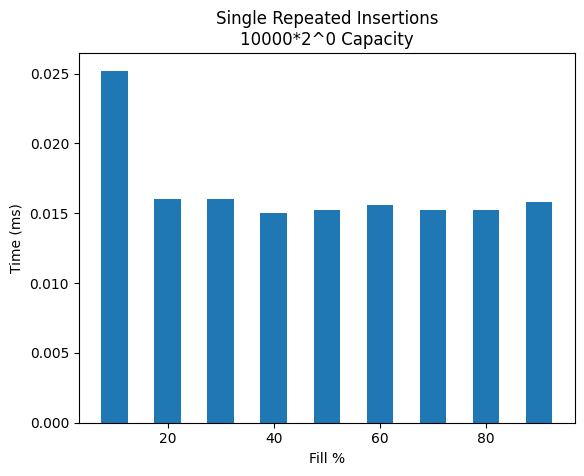

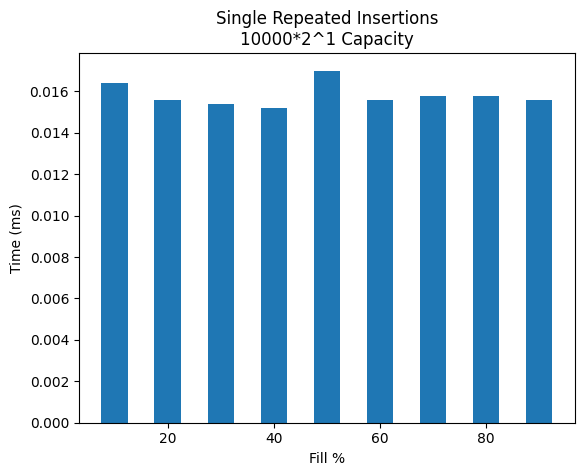

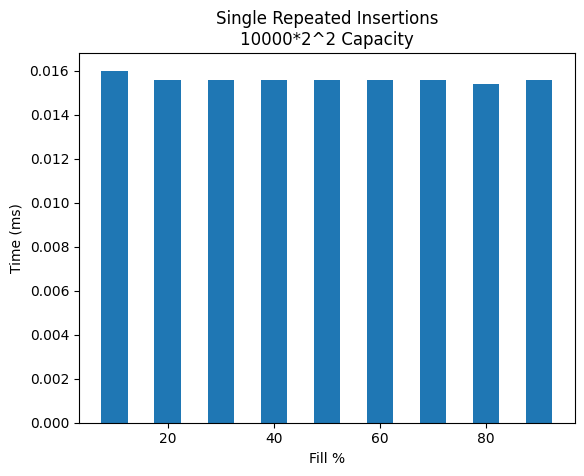

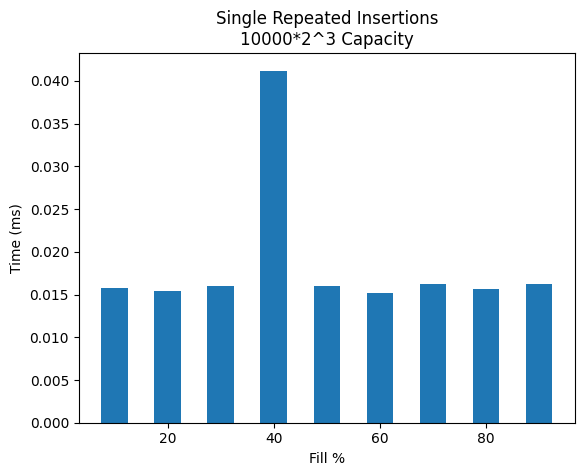

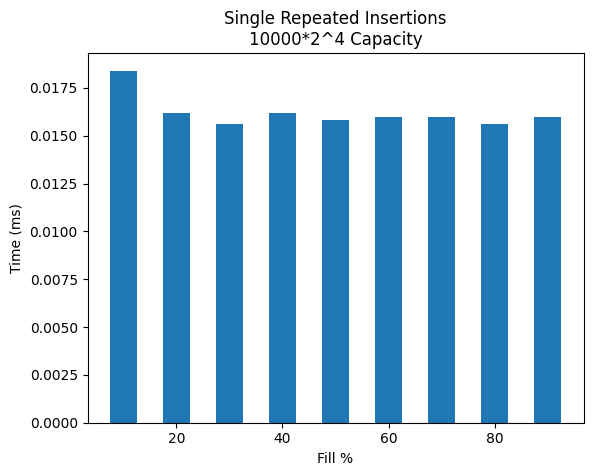

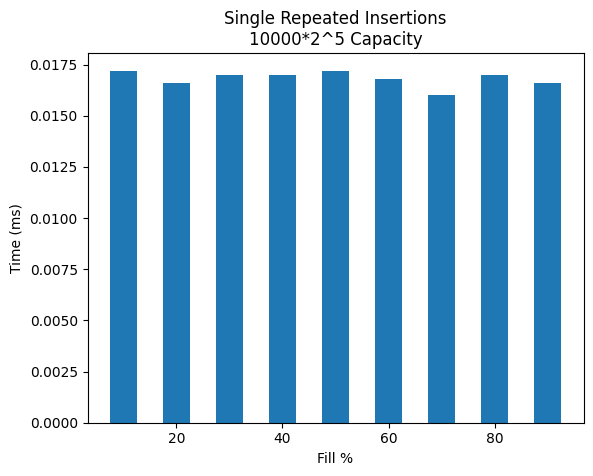

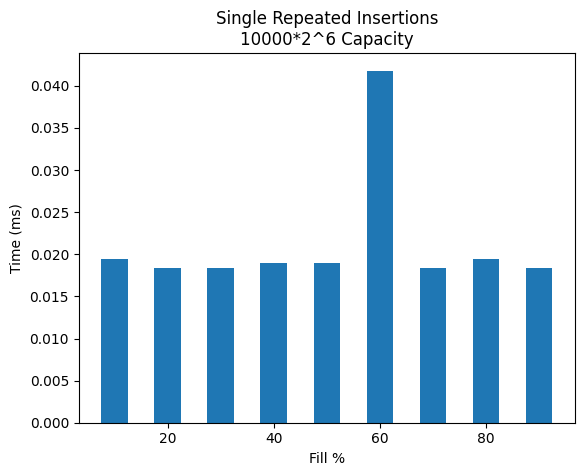

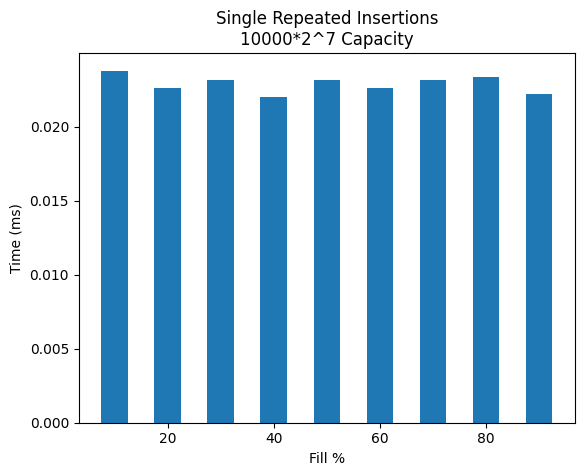

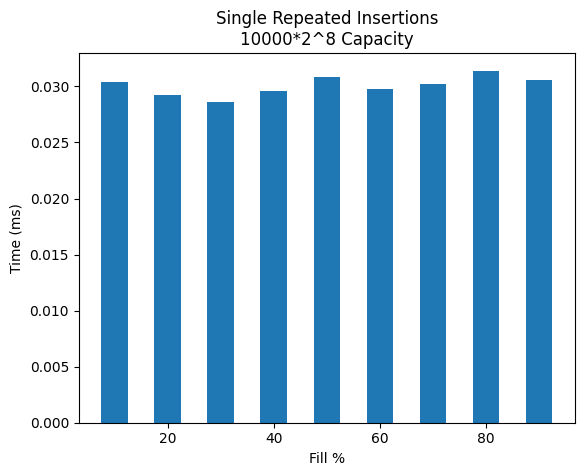

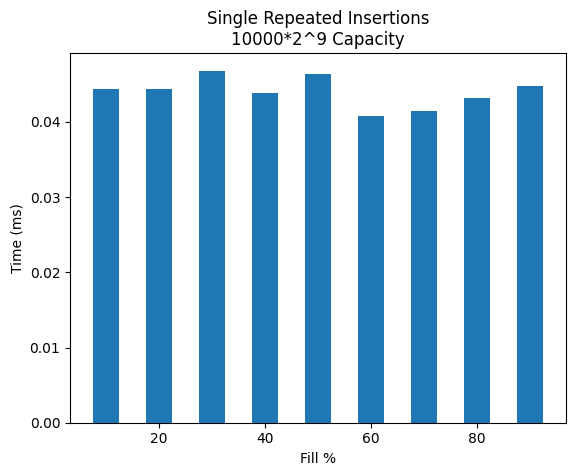

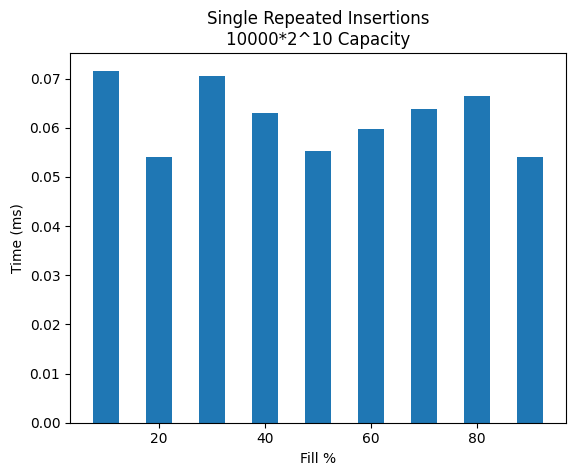

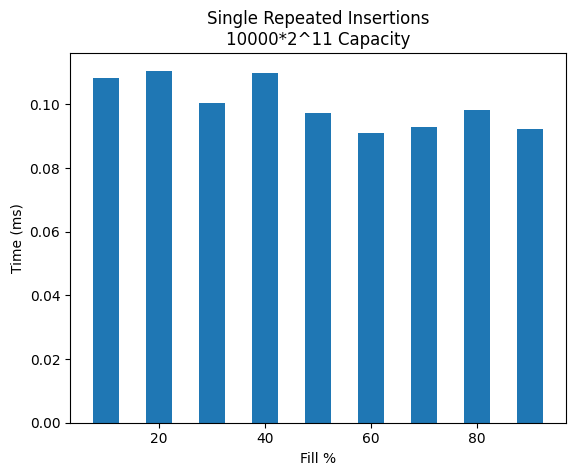

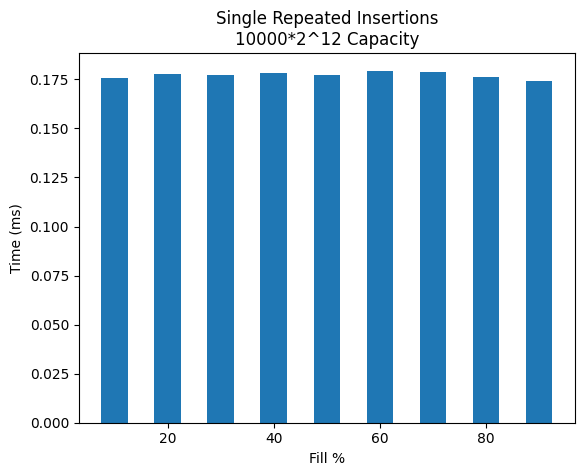

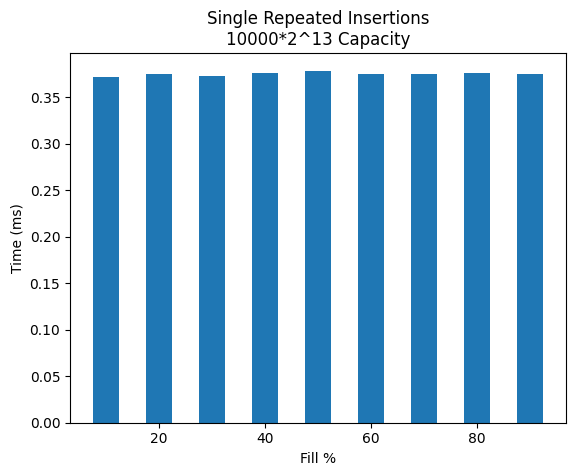

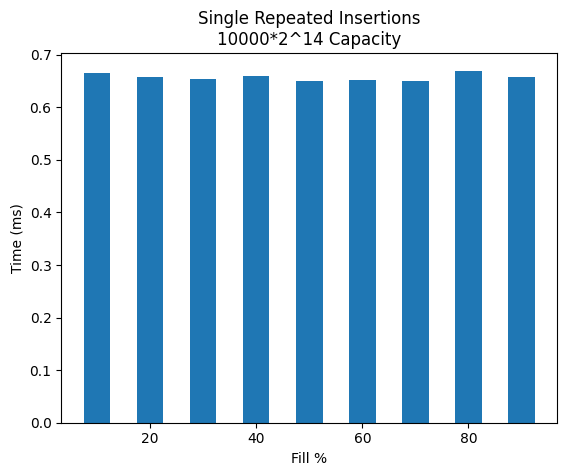

In [192]:
#Graphs of different capacities and they insertion times over different fills
capacity = 10000
for i in range(1, 16):
    rel_data = single_data[single_data["Capacity"] == capacity]
    condensed_average = rel_data.groupby('Fill').agg({'Type': 'first', 'Capacity': 'first', 'Time': 'mean', 'Num Insertions': 'first'}).reset_index()

    x = condensed_average["Fill"]
    # x = [f"10000*2^{i}" for i in range(15)]
    y = np.array(condensed_average["Time"]) * 1000

    plt.bar(x, y, width=5)
    # plt.yscale('log')
    plt.xlabel("Fill %")
    plt.ylabel("Time (ms)")
    plt.title(f"Single Repeated Insertions\n10000*2^{i-1} Capacity")
    plt.show()
    capacity = capacity * 2

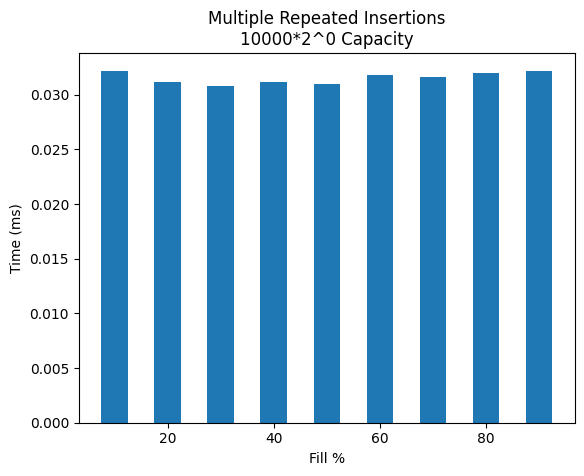

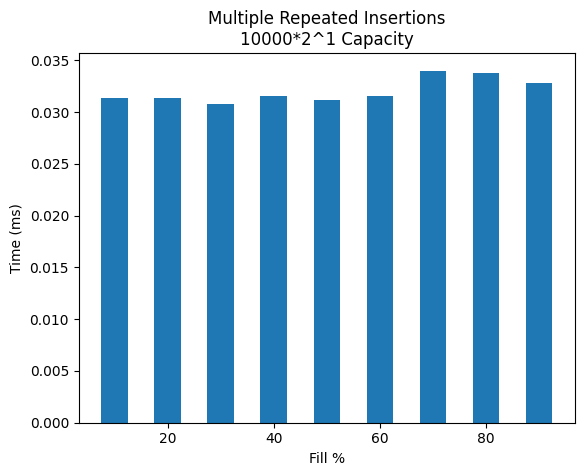

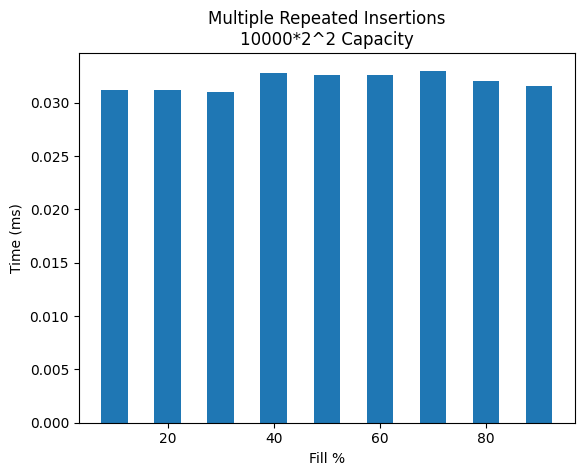

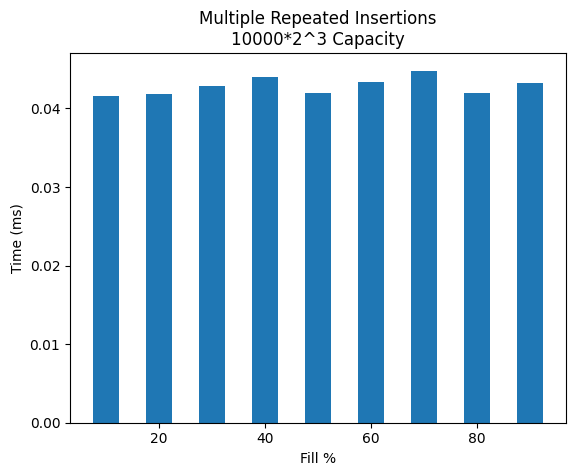

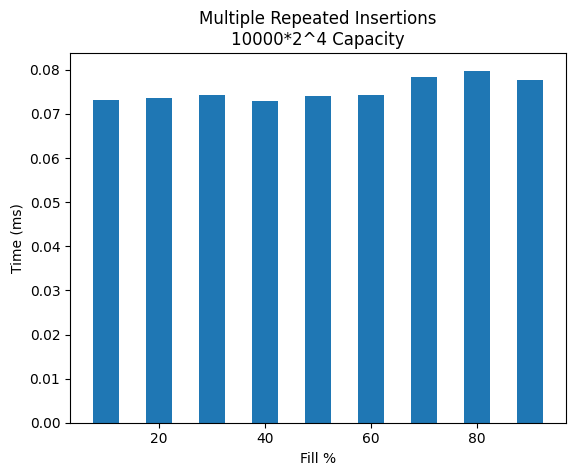

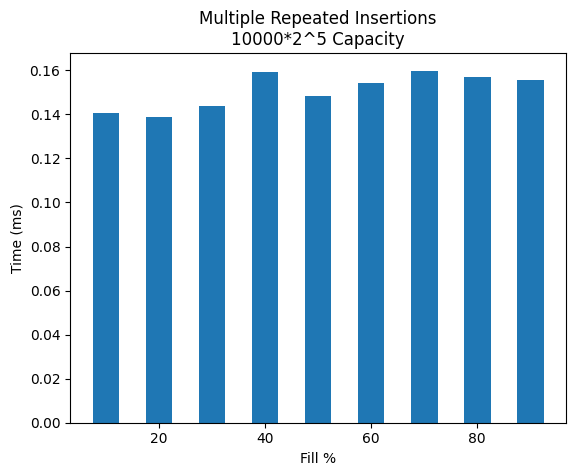

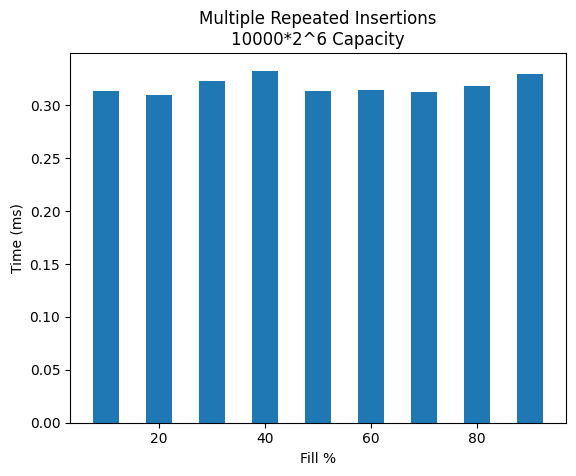

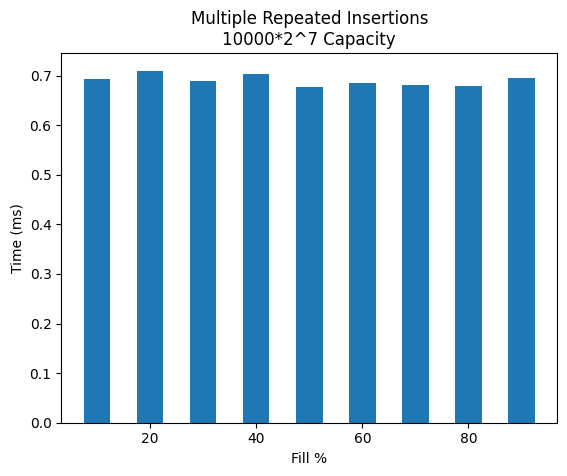

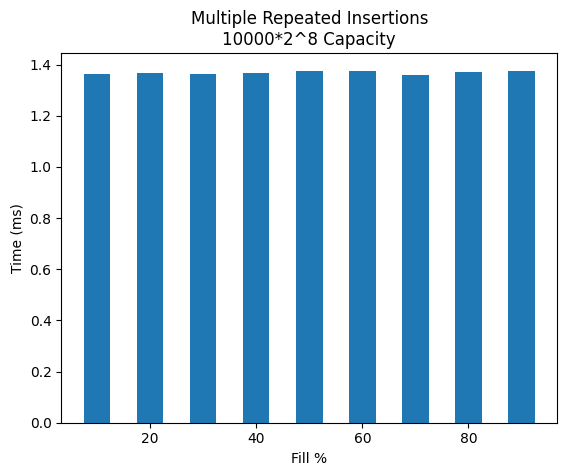

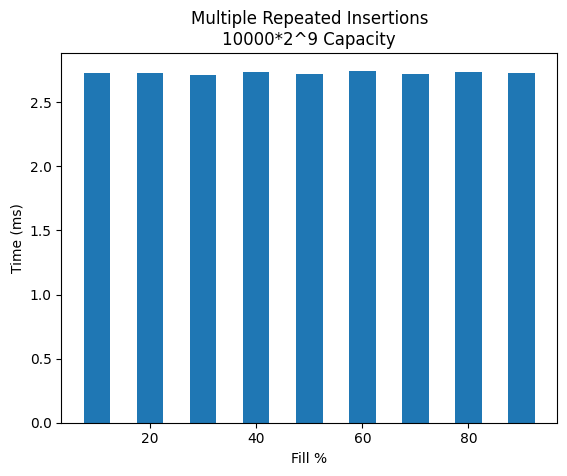

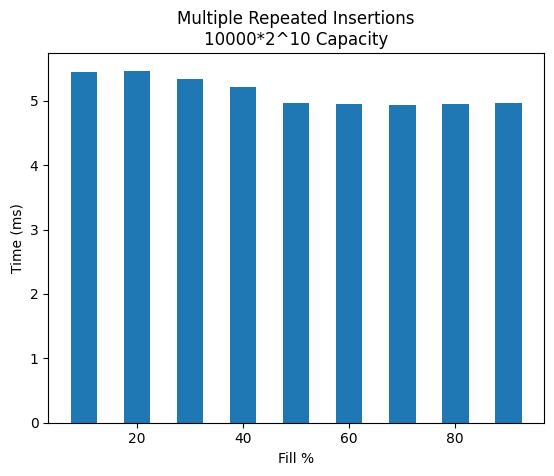

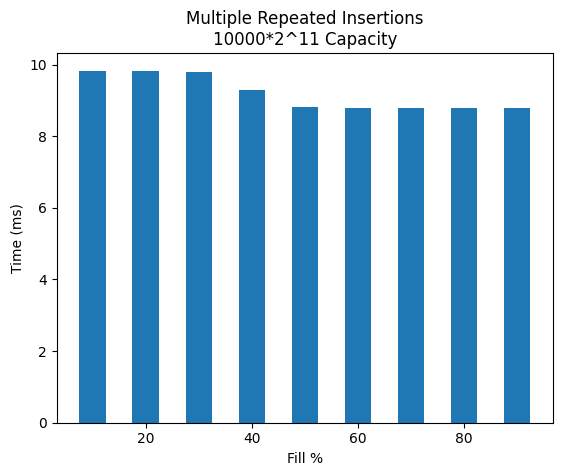

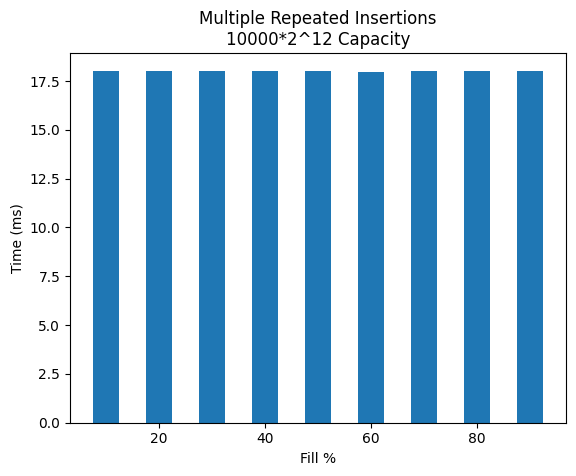

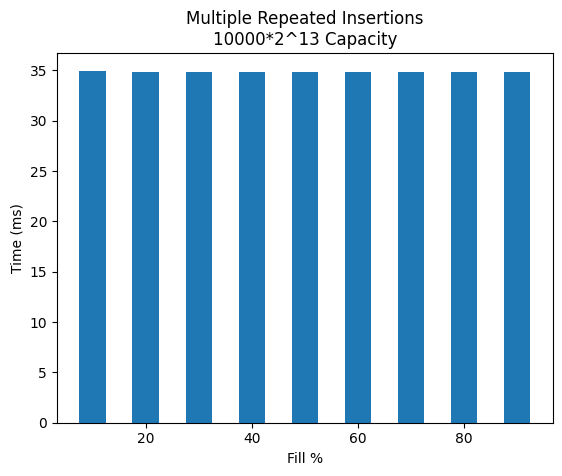

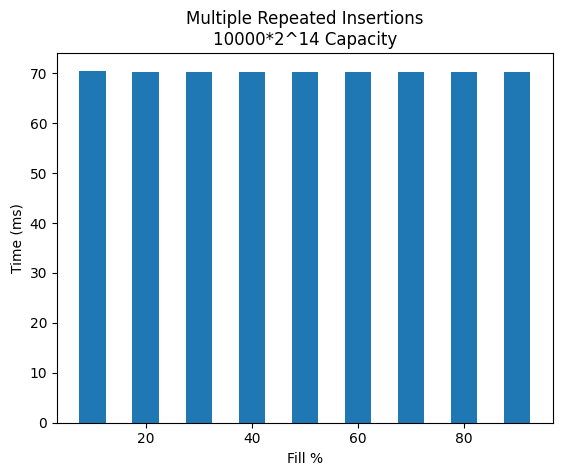

In [191]:
#Graphs of different capacities and they insertion times over different fills
capacity = 10000
for i in range(1, 16):
    rel_data = multiple_data[multiple_data["Capacity"] == capacity]
    condensed_average = rel_data.groupby('Fill').agg({'Type': 'first', 'Capacity': 'first', 'Time': 'mean', 'Num Insertions': 'first'}).reset_index()

    x = condensed_average["Fill"]
    # x = [f"10000*2^{i}" for i in range(15)]
    y = np.array(condensed_average["Time"]) * 1000

    plt.bar(x, y, width=5)
    # plt.yscale('log')
    plt.xlabel("Fill %")
    plt.ylabel("Time (ms)")
    plt.title(f"Multiple Repeated Insertions\n10000*2^{i-1} Capacity")
    plt.show()
    capacity = capacity * 2
#7k in 80k cap var
#average ins find timat at some percentage how at different perc it vairs